In [16]:
# Import Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
# Load Cleaned Dataset

df = pd.read_csv('heart_disease_cleaned.csv')

In [18]:
# Drop index column 

df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_encoded
0,67,1,0,176.0,148.0,1,0,137.5,1,5.6,3,3,0.0,0
1,57,1,1,155.0,551.0,0,1,98.0,1,3.2,2,4,0.0,0
2,43,1,0,125.0,519.0,1,0,113.0,1,3.2,1,4,1.0,2
3,71,0,0,123.0,285.0,0,2,156.0,0,6.2,3,1,1.0,2
4,36,0,0,122.0,488.0,1,1,137.5,1,3.3,3,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,38,0,0,153.0,539.0,1,1,91.0,0,4.7,3,4,0.0,2
417,47,1,1,147.0,239.0,1,2,105.0,1,2.9,2,1,0.0,2
418,60,1,2,98.0,270.0,1,0,100.0,1,5.4,1,0,0.0,2
419,29,1,2,138.0,353.5,1,0,127.0,0,1.3,2,1,0.0,2


In [19]:
# Prepare Features and Target

X = df.drop(columns=['target'])
y = df['target']

In [20]:
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [21]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Check class distribution
print(y.value_counts())

# Check class distribution in percentage
print("\nClass Distribution (in %):\n", y.value_counts(normalize=True) * 100)


target
0.0    216
1.0    205
Name: count, dtype: int64

Class Distribution (in %):
 target
0.0    51.306413
1.0    48.693587
Name: proportion, dtype: float64


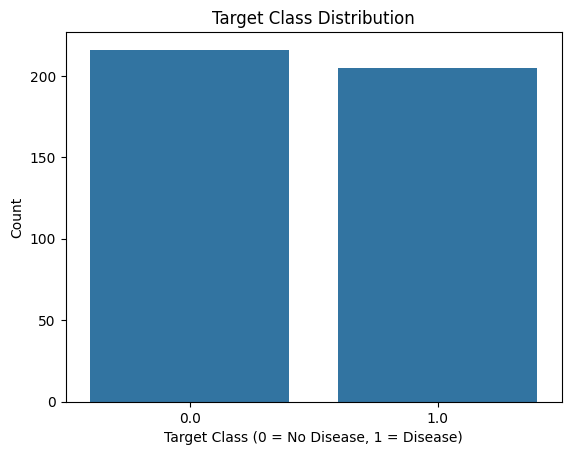

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title('Target Class Distribution')
plt.xlabel('Target Class (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

In [24]:
# Train Models
log_model = LogisticRegression(max_iter=1000, random_state=42)
tree_model = DecisionTreeClassifier( random_state=42)
forest_model = RandomForestClassifier(n_estimators=150, random_state=42)


log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
# Predict and Accuracy
log_acc = accuracy_score(y_test, log_model.predict(X_test))
tree_acc = accuracy_score(y_test, tree_model.predict(X_test))
forest_acc = accuracy_score(y_test, forest_model.predict(X_test))

print("Model Accuracies:")
print(f"Logistic Regression Accuracy: {log_acc*100}%")
print(f"Decision Tree Accuracy: {tree_acc*100}%")
print(f"Random Forest Accuracy: {forest_acc*100}%")

Model Accuracies:
Logistic Regression Accuracy: 49.411764705882355%
Decision Tree Accuracy: 47.05882352941176%
Random Forest Accuracy: 50.588235294117645%


In [26]:
# User Input for Prediction
print("\n Enter patient details to predict heart disease:")

input_data = {
    'age': float(input("Enter Age: ")),
    'sex': int(input("Enter Sex (1=Male, 0=Female): ")),
    'cp': int(input("Enter Chest Pain Type (0-3): ")),
    'trestbps': float(input("Enter Resting Blood Pressure: ")),
    'chol': float(input("Enter Cholesterol: ")),
    'fbs': int(input("Fasting Blood Sugar > 120 mg/dl (1=True, 0=False): ")),
    'restecg': int(input("Resting ECG results (0-2): ")),
    'thalach': float(input("Enter Max Heart Rate Achieved: ")),
    'exang': int(input("Exercise Induced Angina (1=Yes, 0=No): ")),
    'oldpeak': float(input("Enter ST depression: ")),
    'slope': int(input("Slope of ST segment (1-3): ")),
    'ca': int(input("Number of Major Vessels (0-3): ")),
    'thal_encoded': int(input("Thal (0=Fixed, 1=Normal, 2=Reversible): "))
}

# Convert Input to DataFrame
user_df = pd.DataFrame([input_data])

# Predict Using All Models
log_pred = log_model.predict(user_df)[0]
tree_pred = tree_model.predict(user_df)[0]
forest_pred = forest_model.predict(user_df)[0]

# Show Predictions
print(" Model Predictions:")
print("Logistic Regression:", "Heart Disease" if log_pred == 1 else "No Heart Disease")
print("Decision Tree:", "Heart Disease" if tree_pred == 1 else "No Heart Disease")
print("Random Forest:", "Heart Disease" if forest_pred == 1 else "No Heart Disease")



 Enter patient details to predict heart disease:


Enter Age:  67
Enter Sex (1=Male, 0=Female):  1
Enter Chest Pain Type (0-3):  0
Enter Resting Blood Pressure:  176
Enter Cholesterol:  148
Fasting Blood Sugar > 120 mg/dl (1=True, 0=False):  1
Resting ECG results (0-2):  0
Enter Max Heart Rate Achieved:  137
Exercise Induced Angina (1=Yes, 0=No):  1
Enter ST depression:  5.6
Slope of ST segment (1-3):  0
Number of Major Vessels (0-3):  0
Thal (0=Fixed, 1=Normal, 2=Reversible):  0


 Model Predictions:
Logistic Regression: Heart Disease
Decision Tree: Heart Disease
Random Forest: No Heart Disease


 Model Accuracies:
Logistic Regression Accuracy: 49.41%
Decision Tree Accuracy: 47.06%
Random Forest Accuracy: 50.59%

 Confusion Matrix - Logistic Regression:
 [[23 18]
 [25 19]]

 Confusion Matrix - Decision Tree:
 [[20 21]
 [24 20]]

 Confusion Matrix - Random Forest:
 [[22 19]
 [23 21]]


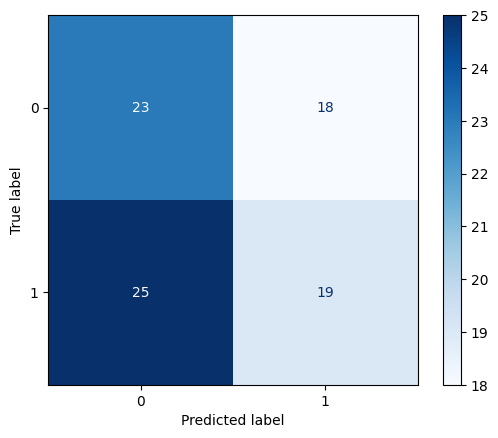

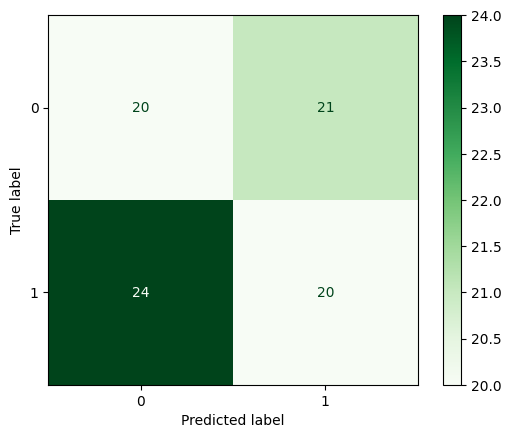

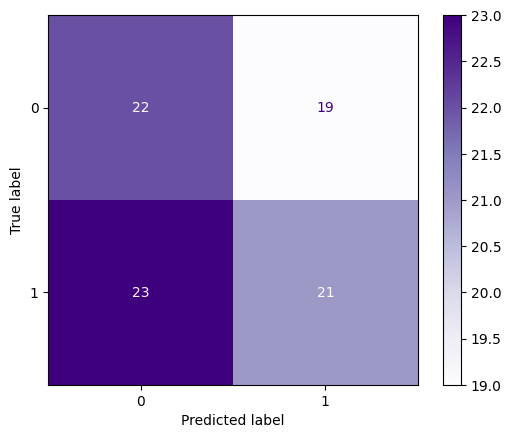

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Predict on test data
log_preds = log_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
forest_preds = forest_model.predict(X_test)

# Accuracy Scores
log_acc = accuracy_score(y_test, log_preds)
tree_acc = accuracy_score(y_test, tree_preds)
forest_acc = accuracy_score(y_test, forest_preds)

# Print Accuracies
print(" Model Accuracies:")
print(f"Logistic Regression Accuracy: {log_acc*100:.2f}%")
print(f"Decision Tree Accuracy: {tree_acc*100:.2f}%")
print(f"Random Forest Accuracy: {forest_acc*100:.2f}%")

#  Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, log_preds)
print("\n Confusion Matrix - Logistic Regression:\n", cm_log)
ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=[0, 1]).plot(cmap='Blues')

#  Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, tree_preds)
print("\n Confusion Matrix - Decision Tree:\n", cm_tree)
ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1]).plot(cmap='Greens')

#  Confusion Matrix for Random Forest
cm_forest = confusion_matrix(y_test, forest_preds)
print("\n Confusion Matrix - Random Forest:\n", cm_forest)
ConfusionMatrixDisplay(confusion_matrix=cm_forest, display_labels=[0, 1]).plot(cmap='Purples')


In [28]:
import pickle as pkl

In [29]:
pkl.dump(forest_model,open("HeartDisease.pkl","wb"))